In [52]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

## Load all data

In [46]:
meta = pd.read_csv("data/meta.csv")


In [47]:
valid_data = meta.loc[meta["edges"]>0,:]

In [48]:
def get_modularity_from_edgelist(edge_df:pd.DataFrame):
    G = nx.from_pandas_edgelist(edge_df,"from","to")
    return nx.community.modularity(G,nx.community.louvain_communities(G,seed=420))

In [49]:
modularity_values = []
for id in tqdm(valid_data["id"]):
    #print(id)
    temp_edgelist = pd.read_csv("data/{}/edges.csv".format(id))
    modularity_values.append(get_modularity_from_edgelist(temp_edgelist))



100%|██████████| 133/133 [00:11<00:00, 11.94it/s]


In [ ]:
valid_data["modularity"] = modularity_values

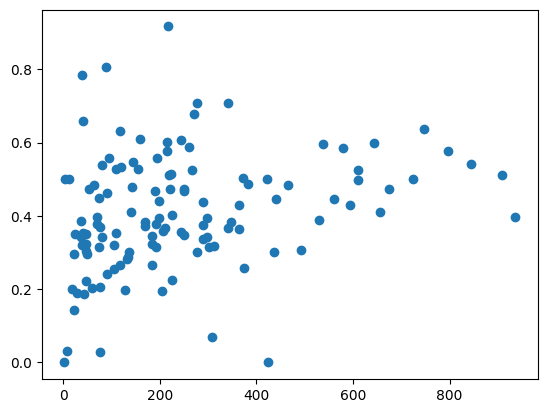

In [57]:
plt.scatter(valid_data.loc[valid_data["nodes"]<1000,"nodes"],
            valid_data.loc[valid_data["nodes"]<1000,"modularity"])

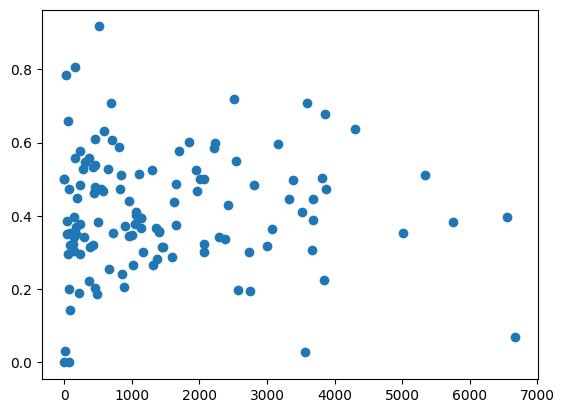

In [63]:
plt.scatter(valid_data.loc[valid_data["edges"]<8000,"edges"],
            valid_data.loc[valid_data["edges"]<8000,"modularity"])

In [54]:
valid_data.loc[valid_data["nodes"]>1000]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity
0,walkingdead,5942.0,72746.0,29,The Walking Dead,8.1,1069183,Walking Dead Wiki,tv,10K,100K,1K,0.652640
1,simpsons,5410.0,30943.0,52,The Simpsons,8.7,432296,Simpsons Wiki,tv,20K,100K,1K,0.612733
2,arrow,3681.0,28806.0,20,The Flash,7.5,366576,Arrowverse Wiki,tv,10K,20K,2K,0.638665
3,greysanatomy,3457.0,13554.0,27,Happy Valley,8.5,63294,Grey's Anatomy Universe Wiki,tv,10K,40K,2K,0.577096
4,24,3180.0,73590.0,1,24,8.4,195824,Wiki 24,tv,9K,10K,10,0.419688
5,supernatural,2634.0,28951.0,50,Paranormal,8.0,74176,Supernatural Wiki,tv,5K,10K,400,0.397708
6,southpark,2455.0,154953.0,63,South Park,8.7,402704,South Park Archives,tv,6K,50K,500,0.594021
7,bones,1720.0,2509.0,35,Bones,7.8,174271,Bones Wiki,tv,2K,5K,700,0.719678
8,house,1513.0,5005.0,33,House,8.7,503036,House Wiki,tv,6K,1K,300,0.352144
9,familyguy,1321.0,2541.0,8,Family Guy,8.2,361387,Family Guy Wiki,tv,7K,9K,10,0.549802
